In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv("Financial Data Cleaned.csv")

In [4]:
df1.shape

(488, 4)

In [5]:
print("No. of rows:",df1.shape[0])
print("No. of columns:",df1.shape[1])

No. of rows: 488
No. of columns: 4


In [ ]:
# finding null values in the data
df1.isnull().sum()

In [9]:
#fill null values with 0
df1=df1.fillna(0)

In [10]:
#cross checking again for null values
df1.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [11]:
#check the duplicate values
df1_dup=df1.duplicated().any()
print(df1_dup)

False


In [13]:
#data analysis

df1.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27526.654836,3581.506844
std,145.884078,59033.540015,9729.282622
min,1.000000,0.000000,0.000000
25%,122.750000,4643.832500,459.357500
50%,252.500000,9460.155000,982.300000
75%,378.250000,23400.815000,2580.797500
max,500.000000,583436.720000,110666.930000


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                488 non-null    int64  
 1   Name                 488 non-null    object 
 2   Mar Cap - Crore      488 non-null    float64
 3   Sales Qtr - Crore    488 non-null    float64
 4   Market Cap Per Sale  479 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [14]:
df1.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [16]:
#calculating market capitalization per sale

df1["Market Cap Per Sale"]=df1['Mar Cap - Crore']/df1['Sales Qtr - Crore']
print("Market Cap Per Sale")
print(df1["Market Cap Per Sale"])

Market Cap Per Sale
0       5.845474
1      18.240676
2      23.465685
3      32.847382
4      17.190535
         ...    
483     3.834074
484    12.140490
485     5.912302
486     1.062068
487          NaN
Name: Market Cap Per Sale, Length: 488, dtype: float64


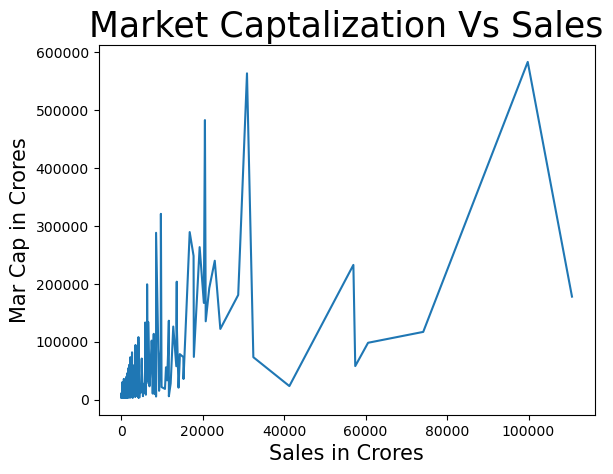

In [17]:
#plotting market capitalization vs sale

sns.lineplot(x='Sales Qtr - Crore',y='Mar Cap - Crore',data=df1)
plt.xlabel("Sales in Crores",fontsize=15)
plt.ylabel("Mar Cap in Crores",fontsize=15)
plt.title("Market Captalization Vs Sales",fontsize=25)
plt.show()

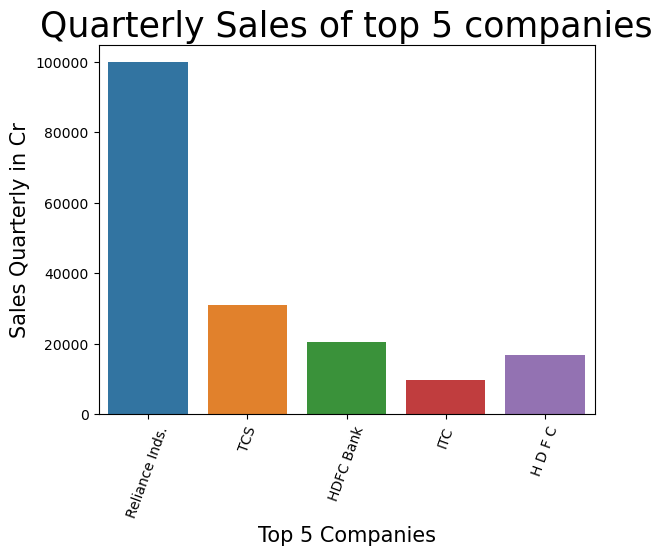

In [20]:
#sorting the dataframe by market captalization and selecct top 5 companies

top_5=df1.nlargest(5,'Mar Cap - Crore')

#plotting the sales of top 5 companies

sns.barplot(x=top_5["Name"],y=top_5['Sales Qtr - Crore'])
plt.xlabel("Top 5 Companies",fontsize=15)
plt.ylabel("Sales Quarterly in Cr",fontsize=15)
plt.title("Quarterly Sales of top 5 companies",fontsize=25)
plt.xticks(rotation=70)
plt.show()

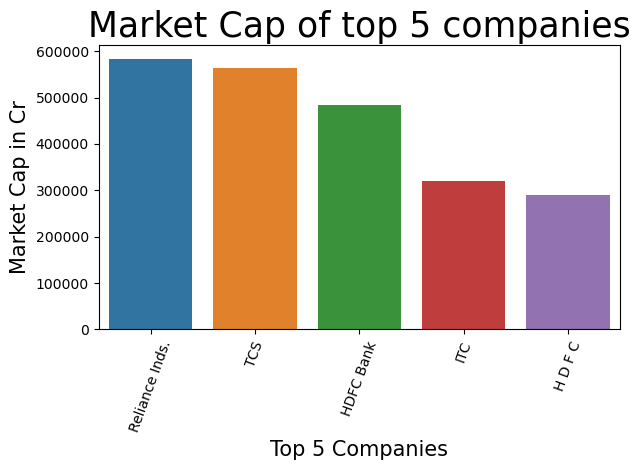

In [21]:
#plotting market captalization of top 5 companies

sns.barplot(x=top_5["Name"],y=top_5['Mar Cap - Crore'])
plt.xlabel("Top 5 Companies",fontsize=15)
plt.ylabel("Market Cap in Cr",fontsize=15)
plt.title("Market Cap of top 5 companies",fontsize=25)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

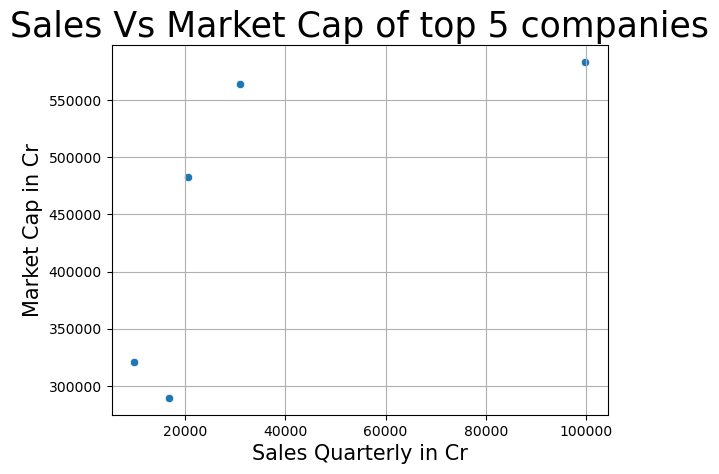

In [22]:
#sorting the dataframe by market captalization and selecct top 5 companies

top_5=df1.nlargest(5,'Mar Cap - Crore')

#creating the scatter plot for top 5 companies

sns.scatterplot(x=top_5['Sales Qtr - Crore'],y=top_5['Mar Cap - Crore'])
plt.xlabel("Sales Quarterly in Cr",fontsize=15)
plt.ylabel("Market Cap in Cr",fontsize=15)
plt.title("Sales Vs Market Cap of top 5 companies",fontsize=25)
plt.grid(True)
plt.show()

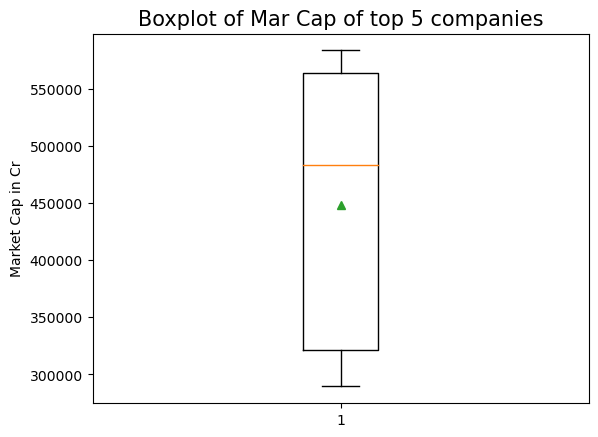

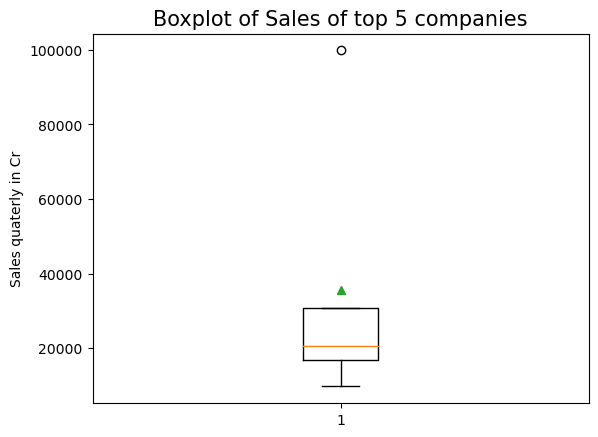

In [25]:
#boxplots of market capitalization and quaterly sales

plt.boxplot(top_5['Mar Cap - Crore'],showmeans=True)
plt.ylabel("Market Cap in Cr")
plt.title("Boxplot of Mar Cap of top 5 companies",fontsize=15)
plt.show()

plt.boxplot(top_5['Sales Qtr - Crore'],showmeans=True)
plt.ylabel("Sales quaterly in Cr")
plt.title("Boxplot of Sales of top 5 companies",fontsize=15)
plt.show()

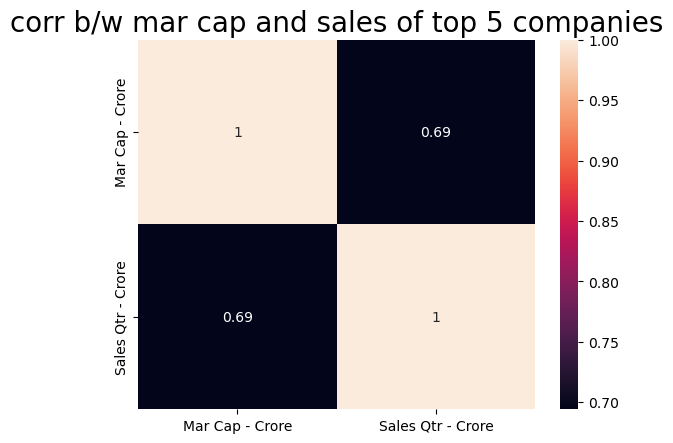

In [32]:
#correlation between mar cap and sales of top 5 companies

corr_matrix=top_5[['Mar Cap - Crore','Sales Qtr - Crore']].corr()

sns.heatmap(corr_matrix,annot=True)
plt.title("corr b/w mar cap and sales of top 5 companies",fontsize=20)
plt.show()